# Computational Physics II — Project 3

## Volume of a hypersphere

Monte Carlo Integration is a tool used when dealing with high-dimensional integrals. The
following project compares numerical integration using grid-like discretization and Monte
Carlo (random) sampling to achieve approximations to the volume of hyperspheres of various
dimensions. The volume of a unit sphere in N dimensions is defined as:

\begin{equation*}
    V_N = \int dx_1 dx_2 ...... dx_N \theta (1-\textbf{r}^2)
\end{equation*}

where $\theta(x)$ is the Heaviside step function and $\textbf{r} ≡ (x_1 , x_2 , . . . , x_N )$ is the N-dimensional position vector.


Please implement several functions that each compute the volume of the hypersphere in N dimensions. Assume only that the hypersphere is contained within a hypercube, that is, you could constrain the integration volume to the ranges $[0, 1]^N$ (using the symmetry of the sphere) or equivalently, $[−1, 1]^N$.

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

####  1. Carry out the rectangular approximation. The corresponding Python function should take the dimension N and the total number of distinct integration points $n_p$ as input. Note that the $n_p$ will have to constitute a regular grid in N dimensions, thus in each dimension there will be $n_p^{1/N}$ distinct points. Hint: The function θ(x) is a binary function, and the volume estimate results from assessing, which fraction of the hypercube is occupied by the hypersphere. The Python function should return the numerically-approximate volume of the hypersphere. (20 pts)

For a 2D approach, we try to approximate the following integral:
\begin{equation*}
    F = \int_a^b f(x) dx
\end{equation*}
This is done by dividing the interval [a, b] into n equally wide segments of length $\Delta x$ as follows:
\begin{equation*}
    \Delta x = \frac{b - a}{n}
\end{equation*}
Next, we specify a sequence of $n+1$ points and define the positions:
\begin{equation*}
    x_n = x_0 + n \Delta x
\end{equation*}
such that $x_0 = a$ and $x_n = b$.


For this purpose, we implement a version of the following equation:
\begin{equation*}
    F_n = \sum_{i=0}^{n-1} f(x_i) \Delta x
\end{equation*}
where $f(x_i)$ is the corresponding value that the x-value at the left boundary takes (Basically, we are computing small strips of area and adding them up).

In [139]:
"""
First, we implement a function to compute the volume of the
hypersphere using a grid-like discretization using a higher dimensional
version of the basic equation above.

In this case, we assign each integration point an N-D
coordinate as shown in the function.
Next, we get the distance to the origin and check how many of
our coordinates fall inside the hypersphere and get the
estimated value using the ratio. (more details
explained in the next block of code for Monte Carlo)

*** It must be noted that this function only works if the
dimension matches the number of points (for example,
if it's 3 dimensions, it must have a number that the third
root can be calculated like 512=8**3 or 1000=10**3) ***

Input Arguments:
    N - dimension
    n_p - total number of distinct integration points

Output:
    VN = numerically approximate volume of the hypersphere

"""
def discretized_integration(N, n_p):
    
    
    dim_size = n_p**(1/N) # points per dimension
    in_hits = 0 # for counting points inside hypersphere
    
    
    for i in range(n_p-1):
        # assigning each point a coordinate
        point = np.array([int((i/dim_size**j) % dim_size) for j in range(N)])
        # computing center
        center = np.array([dim_size/2 for k in range(N)])
        # computing radius
        radius =  np.sqrt(np.sum((point - center)**2))
        if radius <= dim_size/2:
            in_hits += 1
    
    # computing volume of hypercube
    c_vol = 2.0**N

    # computing approximate volume of hypersphere (s_vol)
    s_vol = (in_hits/n_p)*c_vol
    
    return s_vol

VN = discretized_integration(7, 10000000)
print(f'Volume of a 7-D sphere using 10000000 sample points : {VN}') 

Volume of a 7-D sphere using 10000000 sample points : 4.6838016


#### 2. Making the same assumptions on the integration volume and using the same number of points $n_p$, write a function that randomly samples $n_p$ positions $\textbf{r}$ from the integration volume. Thus, approximate the integral $V_N$ by a Monte Carlo integration. (20 pts)


In [140]:
"""
Next, we implement a function to compute the volume of the
hypersphere using Monte Carlo Integration. 

First, we set a counter to count the number of points INSIDE the
hypersphere.
Next, we make a loop to iterate through the number of samples,
generate a random point of N-dimension, calculate and check whether the
radius of that N-D point from the origin falls in the circle.
Finally, we compute the volume of the hypersphere using the equation 

    Volume = (in_hits/n_p)*2.0**N

since the ratio of the points inside the circle to the total points
multiplied by the total volume of the hypercube approximates the 
volume of the hypersphere!
Remember here that since we use the range [-1, 1], our volume scales by this
range (2) ** N!

Input Arguments:
    N - dimension
    n_p - total number of distinct integration points (no. of samples)

Output:
    VN = numerically approximate volume of the hypersphere

"""

def monte_carlo_integration(N, n_p):

    in_hits = 0 # for counting points inside hypersphere

    # a for loop to iterate through number of samples (0 to n_p-1)
    for i in range(n_p):

        # generating random numbers between -1 and 1 depending on dimension which indicates position from origin
        # (Eg:- Will generate an array of 3 random numbers for N=3)
        r = np.random.uniform(-1.0, 1.0, N) 
        
        # calculating the radius from origin of the N-D point (this is most likely an array with multiple points for the number of dimensions)!
        radius = np.sqrt(np.sum(r**2)) 

        if radius <= 1.0:
            in_hits += 1 # incrementing counter if point falls INSIDE the hypersphere

    # computing the volume of the hypercube
    # remember volume of a hypercube is [-1, 1]**N in our case
    c_vol = 2.0**N

    # computing approximate volume of hypersphere (s_vol)
    s_vol = (in_hits/n_p)*c_vol
    
    return s_vol

# example
VN = monte_carlo_integration(7, 10000000)
print(f'Volume of a 7-D sphere using 10000000 sample points : {VN}')

Volume of a 7-D sphere using 10000000 sample points : 4.7275392


#### 3. The analytical solution to the value $V_N$ can be shown to obey the two-term recurrence relation: $V_0 = 1, V_1 = 2, V_N = \frac{2\pi}{N}V_{N-2}$. Implement a recursive Python function that computes $V_N$ for any N from this relation. (10 pts)

In [141]:
"""
Here, we implement a recursive function to compute the analytic 
value for the volume.
This is implemented under the assumption that the sphere 
has a radius R = 1.
"""

def analytic_volume(N):
    if N == 0:
        return 1
    if N == 1:
        return 2
    else:
        return((2*np.pi/N)*analytic_volume(N-2))

# example
VN = analytic_volume(7)
print(f'Volume of a 7-D sphere computed analytically : {VN}')

Volume of a 7-D sphere computed analytically : 4.724765970331401


#### 4. For np ∈ ${10^1, 10^2, 10^3, 10^4, 10^5}$ (approximate values are fine, see ”Hint” below.) and N ∈ {2, . . . , 6} obtain $V_N$ via the rectangular approximation and plot the error, i.e., the absolute value of discrepancy from the exact result as function of $n_p$ for each value of N on a log-log plot. Please describe the results and try to fit straight lines to the curves to extract the power-law exponent for each value of N. Hint: To get integer values of the numbers of steps in each dimension, you may want to depart somewhat from the suggested values $n_p$ above, e.g., for N = 3, choosing $n_p$ = $5^3$ instead of $n_p$ = 100 is more useful. The main idea is just to span several orders of magnitude for $n_p$. (25 pts)

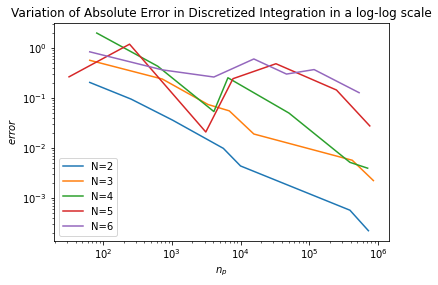

In [142]:
"""
The values used for n_p changed with N since we need a proper split.
    N = [2, 3, 4, 5, 6]
The Monte Carlo Integration is then carried out for each N with varying n_p
values in the same order of magnitude.
"""

# computing results for different n_p values and the same N=2

true_value1 = analytic_volume(2) # computing true value analytically
errors1 = np.zeros(7)
# declaring some values for n_p which will give us an even split (it's always **2 here)
n_p_val1 = np.array([64, 256, 1024, 5625, 10000, 390625, 725904]) 
d = 0
# computing absolute error for each iteration
for j in n_p_val1:
    errors1[d] = abs(discretized_integration(2, j) - true_value1)
    d += 1

# computing results for different n_p values and the same N=3
true_value2 = analytic_volume(3)
errors2 = np.zeros(7)
n_p_val2 = np.array([64, 729, 3375, 6859, 15625, 421875, 857375]) 
d = 0
for j in n_p_val2:
    errors2[d] = abs(discretized_integration(3, j) - true_value2)
    d += 1

# computing results for different n_p values and the same N=4
true_value3 = analytic_volume(4)
errors3 = np.zeros(7)
n_p_val3 = np.array([81, 625, 4096, 6561, 50625, 390625, 707281]) 
d = 0
for j in n_p_val3:
    errors3[d] = abs(discretized_integration(4, j) - true_value3)
    d += 1

# computing results for different n_p values and the same N=5
true_value4 = analytic_volume(5)
errors4 = np.zeros(7)
n_p_val4 = np.array([32, 243, 3125, 7776, 32768, 248832, 759375]) 
d = 0
for j in n_p_val4:
    errors4[d] = abs(discretized_integration(5, j) - true_value4)
    d += 1

# computing results for different n_p values and the same N=6
true_value5 = analytic_volume(6)
errors5 = np.zeros(7)
n_p_val5 = np.array([64, 729, 4096, 15625, 46656, 117649, 531441]) 
d = 0
for j in n_p_val5:
    errors5[d] = abs(discretized_integration(6, j) - true_value5)
    d += 1


plt.loglog(n_p_val1, errors1, label="N=2")
plt.loglog(n_p_val2, errors2, label="N=3")
plt.loglog(n_p_val3, errors3, label="N=4")
plt.loglog(n_p_val4, errors4, label="N=5")
plt.loglog(n_p_val5, errors5, label="N=6")
plt.legend(loc="lower left")
plt.title("Variation of Absolute Error in Discretized Integration in a log-log scale")
plt.xlabel("$n_p$")
plt.ylabel("$error$")
plt.show()

As can be seen from the plot above, for dimensions 2 and 3, the absolute error decreases as $n_p$ increases. However, for dimensions 4 and 5, we can see that there is a sharp dip around the range 1000 - 10000 integration points. For dimension 6, the error decreases ever so slightly. Therefore, it should be noted here that for discretized integration using a grid, when the number of dimensions increase, even when the integration points are increased, there is a minimal difference in the absolute error. (doesn't change much)

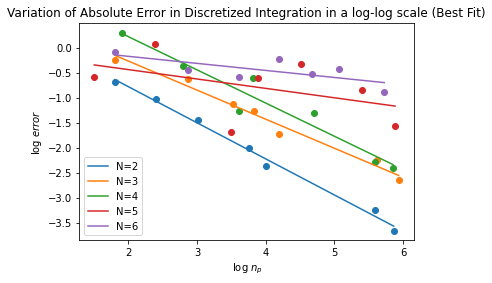

In [143]:
# plotting the best fits as lines and actual points as scatter points

x1 = np.log10(n_p_val1)
y1 = np.log10(errors1)
z1 = np.polyfit(x1, y1, 1)
func1 = z1[0]*x1 + z1[1]
plt.scatter(x1, y1)
plt.plot(x1, func1, label="N=2")

x2 = np.log10(n_p_val2)
y2 = np.log10(errors2)
z2 = np.polyfit(x2, y2, 1)
func2 = z2[0]*x2 + z2[1]
plt.scatter(x2, y2)
plt.plot(x2, func2, label="N=3")

x3 = np.log10(n_p_val3)
y3 = np.log10(errors3)
z3 = np.polyfit(x3, y3, 1)
func3 = z3[0]*x3 + z3[1]
plt.scatter(x3, y3)
plt.plot(x3, func3, label="N=4")

x4 = np.log10(n_p_val4)
y4 = np.log10(errors4)
z4 = np.polyfit(x4, y4, 1)
func4 = z4[0]*x4 + z4[1]
plt.scatter(x4, y4)
plt.plot(x4, func4, label="N=5")

x5 = np.log10(n_p_val5)
y5 = np.log10(errors5)
z5 = np.polyfit(x5, y5, 1)
func5 = z5[0]*x5 + z5[1]
plt.scatter(x5, y5)
plt.plot(x5, func5, label="N=6")

plt.legend(loc="lower left")
plt.title("Variation of Absolute Error in Discretized Integration in a log-log scale (Best Fit)")
plt.xlabel(" log $n_p$")
plt.ylabel("log $error$")
plt.show()

In [144]:
# printing out the power law exponents (slope of the curves foor each N)
slope1, intercept1 = np.polyfit(x1, y1, 1)
slope2, intercept2 = np.polyfit(x2, y2, 1)
slope3, intercept3 = np.polyfit(x3, y3, 1)
slope4, intercept4 = np.polyfit(x4, y4, 1)
slope5, intercept5 = np.polyfit(x5, y5, 1)

print(f'Power Law Exponent for N=2 : {slope1}')
print(f'Power Law Exponent for N=3 : {slope2}')
print(f'Power Law Exponent for N=4 : {slope3}')
print(f'Power Law Exponent for N=5 : {slope4}')
print(f'Power Law Exponent for N=6 : {slope5}')

Power Law Exponent for N=2 : -0.7207979092939321
Power Law Exponent for N=3 : -0.5803195746209683
Power Law Exponent for N=4 : -0.662954797063048
Power Law Exponent for N=5 : -0.18754371883672424
Power Law Exponent for N=6 : -0.14077546100951016


#### 5. For each combination of N and $n_p$, used in the previous exercise, produce a Monte Carlo integration to estimate the value of $V_N$ . For each combination of N and $n_p$ repeat this Monte Carlo integration perhaps 20 times to get an ensemble of results (using distinct seeds for the RNG). From the resulting set of estimates compute the sample variance $\sigma^2 \approx \frac{1}{n_p}(\langle f(x)^2\rangle - \langle f(x)\rangle^2)$. Plot $\sigma^2$ vs. $n_p$ for each value of N on a log-log plot. Again try to fit straight lines to the different curves and extract the power-law exponents. Compare with the results from the rectangular approximation and try to estimate the lowest dimension where a Monte Carlo simulation is preferable in the large-N limit. (25 pts)


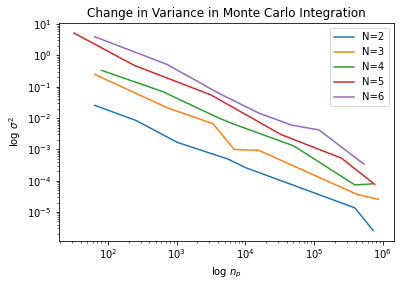

In [145]:
"""
The values used for n_p and N are as used in the
previous exercise.
For each value of N, the volume was computed
using all the values of n_p.

For each value of n_p, Monte Carlo
was done 20 times to get an ensemble. The variance
was then computed from these 20 values for each
value of n_p.

This is repeated for all dimensions!
"""

# computing results for different n_p values and the same N=2
volumes1 = np.zeros(20)
varience1 = np.zeros(7)
k = 0
a = 0
for j in n_p_val1:
    for p in range(20):
        volumes1[k] = monte_carlo_integration(2, j)
        k += 1
    varience1[a] = np.var(volumes1)
    a += 1
    k = 0


# computing results for different n_p values and the same N=3
volumes2 = np.zeros(20)
varience2 = np.zeros(7)
k = 0
a = 0
for j in n_p_val2:
    for p in range(20):
        volumes2[k] = monte_carlo_integration(3, j)
        k += 1
    varience2[a] = np.var(volumes2)
    a += 1
    k = 0


# computing results for different n_p values and the same N=4
volumes3 = np.zeros(20)
varience3 = np.zeros(7)
k = 0
a = 0
for j in n_p_val3:
    for p in range(20):
        volumes3[k] = monte_carlo_integration(4, j)
        k += 1
    varience3[a] = np.var(volumes3)
    a += 1
    k = 0


# computing results for different n_p values and the same N=5
volumes4 = np.zeros(20)
varience4 = np.zeros(7)
k = 0
a = 0
for j in n_p_val4:
    for p in range(20):
        volumes4[k] = monte_carlo_integration(5, j)
        k += 1
    varience4[a] = np.var(volumes4)
    a += 1
    k = 0


# computing results for different n_p values and the same N=6
volumes5 = np.zeros(20)
varience5 = np.zeros(7)
k = 0
a = 0
for j in n_p_val5:
    for p in range(20):
        volumes5[k] = monte_carlo_integration(6, j)
        k += 1
    varience5[a] = np.var(volumes5)
    a += 1
    k = 0


plt.loglog(n_p_val1, varience1, label="N=2")
plt.loglog(n_p_val2, varience2, label="N=3")
plt.loglog(n_p_val3, varience3, label="N=4")
plt.loglog(n_p_val4, varience4, label="N=5")
plt.loglog(n_p_val5, varience5, label="N=6")
plt.legend(loc="upper right")
plt.title("Change in Variance in Monte Carlo Integration")
plt.xlabel("log $n_p$")
plt.ylabel("log $\sigma^2$")
plt.show()


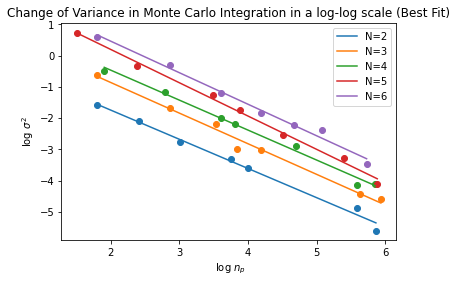

In [147]:
# plotting the best fits as lines and actual points as scatter points

x1 = np.log10(n_p_val1)
y1 = np.log10(varience1)
z1 = np.polyfit(x1, y1, 1)
func1 = z1[0]*x1 + z1[1]
plt.scatter(x1, y1)
plt.plot(x1, func1, label="N=2")

x2 = np.log10(n_p_val2)
y2 = np.log10(varience2)
z2 = np.polyfit(x2, y2, 1)
func2 = z2[0]*x2 + z2[1]
plt.scatter(x2, y2)
plt.plot(x2, func2, label="N=3")

x3 = np.log10(n_p_val3)
y3 = np.log10(varience3)
z3 = np.polyfit(x3, y3, 1)
func3 = z3[0]*x3 + z3[1]
plt.scatter(x3, y3)
plt.plot(x3, func3, label="N=4")

x4 = np.log10(n_p_val4)
y4 = np.log10(varience4)
z4 = np.polyfit(x4, y4, 1)
func4 = z4[0]*x4 + z4[1]
plt.scatter(x4, y4)
plt.plot(x4, func4, label="N=5")

x5 = np.log10(n_p_val5)
y5 = np.log10(varience5)
z5 = np.polyfit(x5, y5, 1)
func5 = z5[0]*x5 + z5[1]
plt.scatter(x5, y5)
plt.plot(x5, func5, label="N=6")

plt.legend(loc="upper right")
plt.title("Change of Variance in Monte Carlo Integration in a log-log scale (Best Fit)")
plt.xlabel(" log $n_p$")
plt.ylabel("log $\sigma^2$")
plt.show()

In [148]:
# printing out the power law exponents (slope of the curves foor each N)
slope1, intercept1 = np.polyfit(x1, y1, 1)
slope2, intercept2 = np.polyfit(x2, y2, 1)
slope3, intercept3 = np.polyfit(x3, y3, 1)
slope4, intercept4 = np.polyfit(x4, y4, 1)
slope5, intercept5 = np.polyfit(x5, y5, 1)

print(f'Power Law Exponent for N=2 : {slope1}')
print(f'Power Law Exponent for N=3 : {slope2}')
print(f'Power Law Exponent for N=4 : {slope3}')
print(f'Power Law Exponent for N=5 : {slope4}')
print(f'Power Law Exponent for N=6 : {slope5}')

Power Law Exponent for N=2 : -0.9359017185019785
Power Law Exponent for N=3 : -0.9818564720921493
Power Law Exponent for N=4 : -0.960784813950283
Power Law Exponent for N=5 : -1.0678101734977987
Power Law Exponent for N=6 : -1.0110356417095414


As clearly seen observing the plots and the power law exponents, for discretized integration, the erros scales with the dimension (as dimension increases, the error increases). However, for Monte Carlo integration, the power law exponent is almost constant which means that the variance is independant of the dimension! This is a clear difference which is why Monte Carlo is more widely used. 

Also, from comparing the power law exponents, we can see that Monte Carlo is preferable from N=2, since the power law exponents for the Monte Carlo have a higher value which means that it converges faster. 